<a href="https://colab.research.google.com/github/tinghaw555/Assignment-Group-Brilliant-Bluejay-SKEE-1033-Scientific-Programming-/blob/main/Assignment_SKEE_1033_Group_Brilliant_Bluejay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## 4.0 Task 1 – Data Cleaning Process

- Inspect the dataset for missing values and outliers using Python libraries such as pandas and numpy.

- Document the number of missing values and describe how you will handle them (e.g., using mean, median or interpolation)

- Detect and handle outliers in electricty consumption and cost using the interquartile Range(IQR) or Z-score method.

- Code and procedure refer to code cells.
---

In [7]:
# Task 1: Data Cleaning Process

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("dataset_student.csv")

# Inspect missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Sort data for proper time-based interpolation
df = df.sort_values(by=["Region", "Year", "Month"])

# Handle missing values using INTERPOLATION per Region
df["Consumption_kWh"] = (
    df.groupby("Region")["Consumption_kWh"]
    .transform(lambda x: x.interpolate(method="linear"))
)

df["Cost_RM"] = (
    df.groupby("Region")["Cost_RM"]
    .transform(lambda x: x.interpolate(method="linear"))
)

# Handle missing Occupants using MEDIAN BY REGION
df["Occupants"] = (
    df.groupby("Region")["Occupants"]
    .transform(lambda x: x.fillna(x.median()))
)

print("\nMissing values after handling:")
print(df.isnull().sum())

# Detect and handle outliers (IQR) — Consumption_kWh
for col in ["Consumption_kWh", "Cost_RM"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = (df[col] < lower) | (df[col] > upper)
    print(f"{col} outliers detected: {outliers.sum()}")

    # Replace outliers with median
    df.loc[outliers, col] = df[col].median()

print("\nOutliers replaced with median values.")

# Final Cleaned Dataset Preview
print("\nCleaned dataset preview:")
print(df.head())

# 7. Save Cleaned Dataset
df.to_csv("cleaned_electricity_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_electricity_data.csv'")


Missing values before cleaning:
Year               0
Month              0
Region             0
Consumption_kWh    5
Cost_RM            5
Occupants          5
dtype: int64

Missing values after handling:
Year               0
Month              0
Region             0
Consumption_kWh    0
Cost_RM            0
Occupants          0
dtype: int64
Consumption_kWh outliers detected: 2
Cost_RM outliers detected: 0

Outliers replaced with median values.

Cleaned dataset preview:
    Year  Month Region  Consumption_kWh  Cost_RM  Occupants
2   2018      1  Rural           283.32   161.49        6.0
5   2018      2  Rural           341.51   194.66        4.0
8   2018      3  Rural           355.59   202.69        7.0
11  2018      4  Rural           337.14   192.17        7.0
14  2018      5  Rural           342.52   195.24        6.0

Cleaned dataset saved as 'cleaned_electricity_data.csv'


---
## 5.0 Task 2 – Descriptive Data Analysis

- Compute summary statistics (mean, median and standard deviation) for Consumption_kWh and Cost_RM by region)
- Analyse the relationship between consumption and number of occupants using a correlation coefficient.
- Comment on any observable relationship patterns.
- Code and procedure refer to code cells.

---

Summary Statistics by Region:
         Consumption_kWh                Cost_RM               
                    mean  median    std    mean  median    std
Region                                                        
Rural             304.13  295.98  45.75  172.35  168.71  24.60
Suburban          398.51  407.51  47.62  227.04  232.28  26.98
Urban             499.01  498.93  41.63  285.05  284.39  22.75

Overall Correlation (All Regions):
                 Consumption_kWh  Occupants
Consumption_kWh         1.000000  -0.542103
Occupants              -0.542103   1.000000

Correlation by Region:

Rural Region:
                 Consumption_kWh  Occupants
Consumption_kWh         1.000000   0.035219
Occupants               0.035219   1.000000

Suburban Region:
                 Consumption_kWh  Occupants
Consumption_kWh         1.000000  -0.187305
Occupants              -0.187305   1.000000

Urban Region:
                 Consumption_kWh  Occupants
Consumption_kWh         1.000000  -0.038301


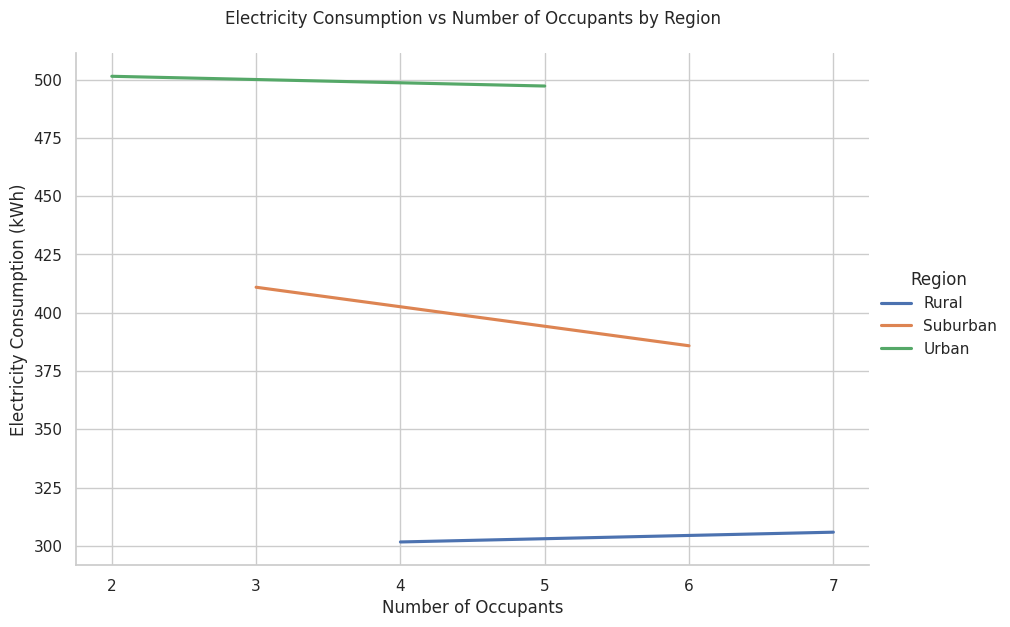

Discussion:
The overall correlation for all regions is -0.5421, means that while the occupants increases, the electricty consumption will decrease and vice versa.
For the rural region, the correlation is positive, so while the occupants increase, the electricity consumption will increase.
For the suburban and urban region, the correlation is negative, so while the occupants increase, the electricity consumption will decrease.


In [8]:
# Task 2: Descriptive Data Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load cleaned dataset
df = pd.read_csv("cleaned_electricity_data.csv")

# 2. Summary statistics by Region
summary_stats = df.groupby("Region")[["Consumption_kWh", "Cost_RM"]].agg(
    ["mean", "median", "std"]
).round(2)

print("Summary Statistics by Region:")
print(summary_stats)

# Overall correlation
overall_corr = df[["Consumption_kWh", "Occupants"]].corr()
print("\nOverall Correlation (All Regions):")
print(overall_corr)

# Correlation by Region
print("\nCorrelation by Region:")

for region in df["Region"].unique():
    region_df = df[df["Region"] == region]
    corr = region_df[["Consumption_kWh", "Occupants"]].corr()
    print(f"\n{region} Region:")
    print(corr)

# -----------------------------------------------------
# Plot regression lines only
sns.lmplot(
    data=df,
    x='Occupants',
    y='Consumption_kWh',
    hue='Region',
    height=6,
    aspect=1.5,
    markers=['o', 's', '^'],
    ci=None,
    scatter=False
)

plt.title("Electricity Consumption vs Number of Occupants by Region\n")
plt.xlabel("Number of Occupants")
plt.ylabel("Electricity Consumption (kWh)")
plt.grid(True)
plt.show()

print("Discussion:")
print("The overall correlation for all regions is -0.5421, means that while the occupants increases, the electricty consumption will decrease and vice versa.")
print("For the rural region, the correlation is positive, so while the occupants increase, the electricity consumption will increase.")
print("For the suburban and urban region, the correlation is negative, so while the occupants increase, the electricity consumption will decrease.")


---
## 6.0 Task 3 – Data Visualisation

- Plot monthly consumption trends for each region using line graphs.
 - Create a multi-line plot comparing all three regions.
- Plot a scatter plot showing the relationship between the number of occupant and electricity consumption.
- Explain any outlier or unusual patterns observed in the graphs, such as sudden spikes in consumption or irregular points in the scatter plot.
- Code and procedure refer to code cells.

---

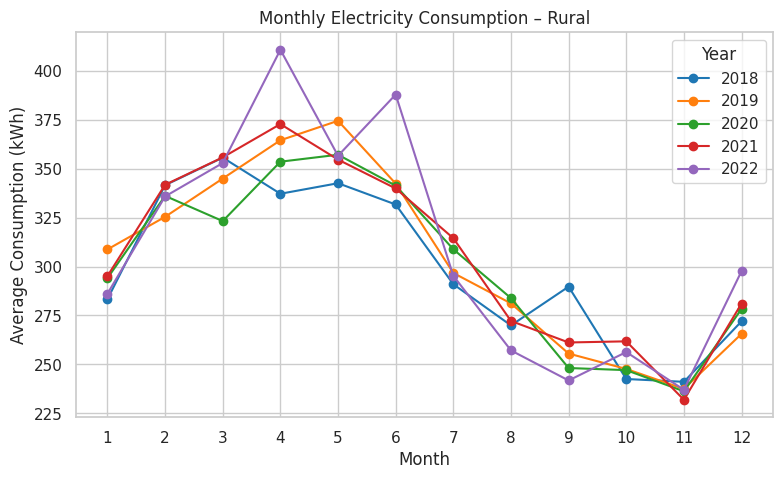

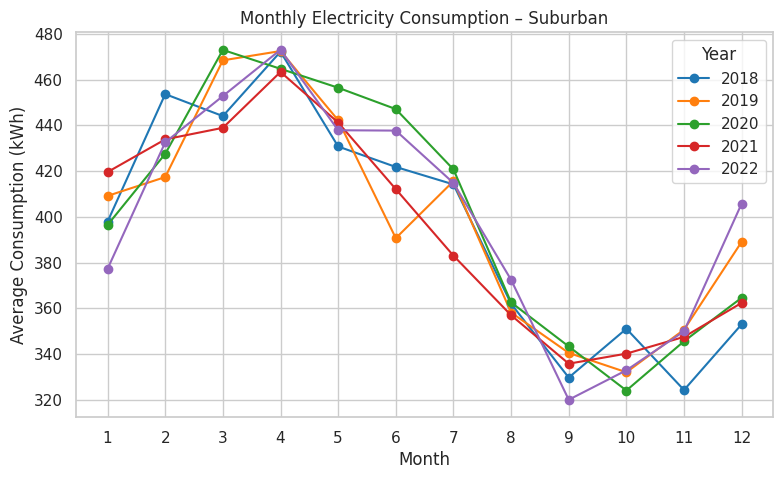

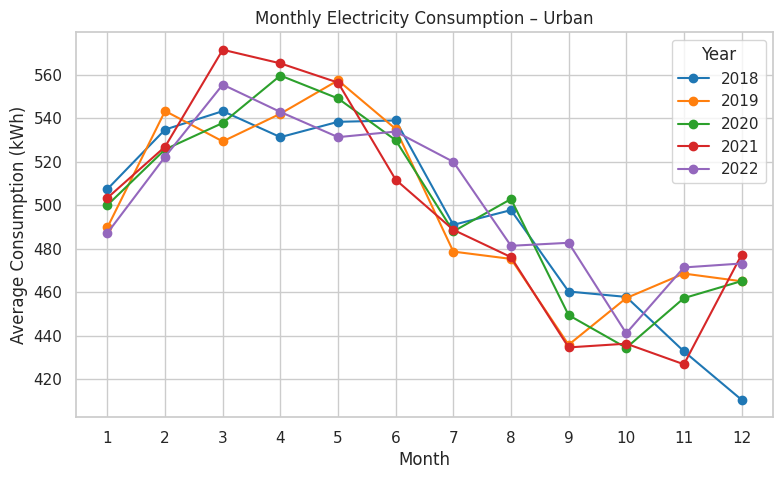

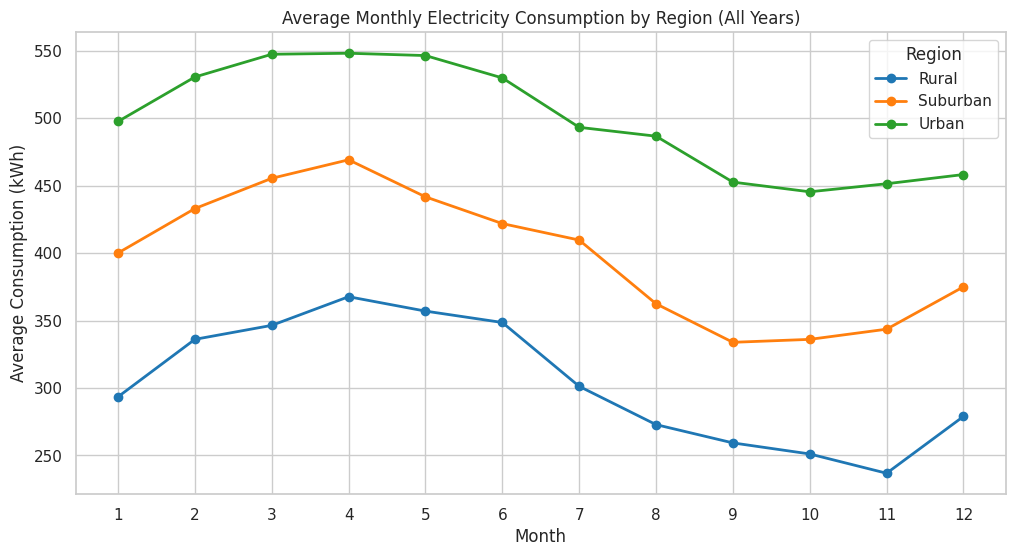

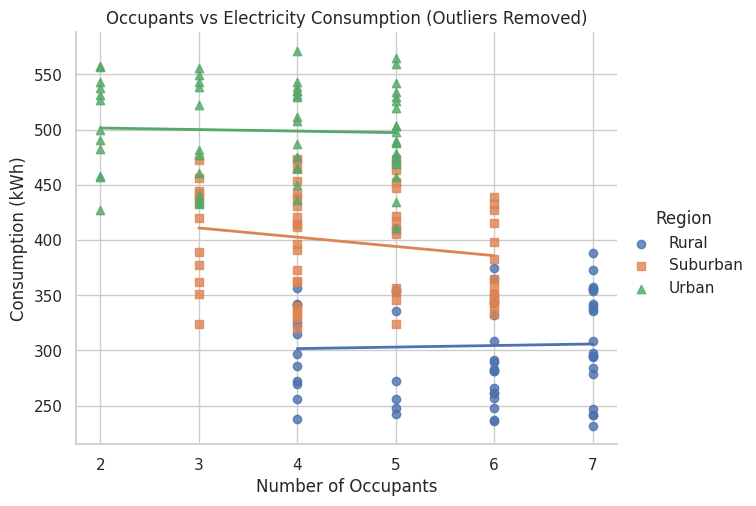

Discussion:
There have some outliers inside Scatter Plot and removed it by detect and removed them. Inside the Rural region, there have unusual off-peak in April and June 2022, 
there might have been an unusual weather event (either cold weather or hot weather) to using electrical appliances to provide heating or cooling and cause more electricity consumption used.


In [9]:

# Task 3: Data Visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load cleaned dataset
df = pd.read_csv("cleaned_electricity_data.csv")

# Ensure numeric types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Consumption_kWh'] = pd.to_numeric(df['Consumption_kWh'], errors='coerce')
df['Occupants'] = pd.to_numeric(df['Occupants'], errors='coerce')


# 2. Handle outliers (optional for monthly trends)
def handle_outliers(df, column='Consumption_kWh'):
    df_out = df.copy()
    for region in df_out['Region'].unique():
        region_data = df_out[df_out['Region']==region]
        Q1 = region_data[column].quantile(0.25)
        Q3 = region_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median_val = region_data[column].median()
        df_out.loc[(df_out['Region']==region) & ((df_out[column]<lower) | (df_out[column]>upper)), column] = median_val
    return df_out

df_cleaned = handle_outliers(df, column='Consumption_kWh')


# Monthly trend per region by year
regions = df_cleaned['Region'].unique()
years = sorted(df_cleaned['Year'].unique())
colors_year = sns.color_palette("tab10", len(years))

for region in regions:
    plt.figure(figsize=(9,5))
    region_data = df_cleaned[df_cleaned['Region']==region]
    for i, year in enumerate(years):
        year_data = region_data[region_data['Year']==year].groupby('Month')['Consumption_kWh'].mean().reset_index()
        plt.plot(
            year_data['Month'],
            year_data['Consumption_kWh'],
            marker='o',
            label=str(year),
            color=colors_year[i]
        )
    plt.title(f'Monthly Electricity Consumption – {region}')
    plt.xlabel('Month')
    plt.ylabel('Average Consumption (kWh)')
    plt.xticks(range(1,13))
    plt.grid(True)
    plt.legend(title='Year')
    plt.show()

# Multi-line plot: Average monthly consumption by region (all years)
colors_region = sns.color_palette("tab10", len(regions))

plt.figure(figsize=(12,6))
for i, region in enumerate(regions):
    monthly_avg = df_cleaned[df_cleaned['Region']==region].groupby('Month')['Consumption_kWh'].mean().reset_index()
    plt.plot(
        monthly_avg['Month'],
        monthly_avg['Consumption_kWh'],
        marker='o',
        linewidth=2,
        color=colors_region[i],
        label=region
    )

plt.title('Average Monthly Electricity Consumption by Region (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Consumption (kWh)')
plt.xticks(range(1,13))
plt.grid(True)
plt.legend(title='Region')
plt.show()

# Scatter plot: Occupants vs Consumption with trend line, outliers removed
def remove_outliers(df, column='Consumption_kWh'):
    df_out = pd.DataFrame()
    for region in df['Region'].unique():
        region_data = df[df['Region']==region].copy()
        Q1 = region_data[column].quantile(0.25)
        Q3 = region_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        region_data = region_data[(region_data[column]>=lower) & (region_data[column]<=upper)]
        df_out = pd.concat([df_out, region_data])
    return df_out

df_no_outliers = remove_outliers(df_cleaned, column='Consumption_kWh')

sns.set(style="whitegrid")
sns.lmplot(
    data=df_no_outliers,
    x='Occupants',
    y='Consumption_kWh',
    hue='Region',
    height=5,
    aspect=1.3,
    ci=None,
    markers=['o','s','^'],
    scatter=True,
    line_kws={'linewidth':2}
)
plt.title('Occupants vs Electricity Consumption (Outliers Removed)')
plt.xlabel('Number of Occupants')
plt.ylabel('Consumption (kWh)')
plt.show()

print("Discussion:")
print("There have some outliers inside Scatter Plot and removed it by detect and removed them. Inside the Rural region, there have unusual off-peak in April and June 2022, \nthere might have been an unusual weather event (either cold weather or hot weather) to using electrical appliances to provide heating or cooling and cause more electricity consumption used.")



---
## 7.0 Task 4 – Prediction Analysis

-	Build a linear Regression model to predict electricity cost (Cost_RM) based on consumption and number of occupants.
1.	Split the dataset into training and training sets (80:20 ratio).
2.	Train the linear regression model.
3.	Evaluate its performance using R-squared and Mean Absolute Error (MAE).
4. Plot Actual vs Predicted Electricity Cost and include a red dashed line (y = x) to represent perfect
prediction.
- Points above the line → over-predicted values.
- Points below the line → under-predicted values.
- Code and procedure refer to code cells.

---

R-squared on test set: 0.9993
Mean Absolute Error on test set: 0.6621


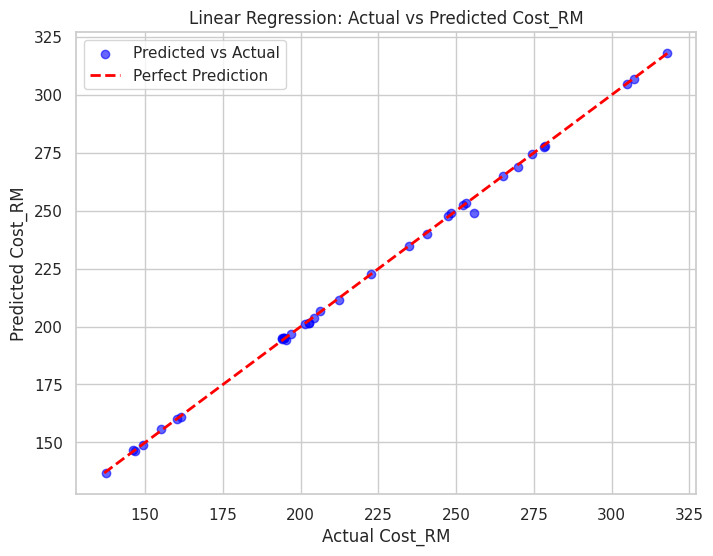

In [10]:
#Task4 : Prediction Analysis
# Import required Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load cleaned dataset
df = pd.read_csv("cleaned_electricity_data.csv")

# Prepare features and target
X = df[['Consumption_kWh', 'Occupants']]
y = df['Cost_RM']

# Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43
)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared on test set: {r2:.4f}")
print(f"Mean Absolute Error on test set: {mae:.4f}")

# 4. Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Cost_RM')
plt.ylabel('Predicted Cost_RM')
plt.title('Linear Regression: Actual vs Predicted Cost_RM')
plt.legend()
plt.grid(True)
plt.show()

print()